## PROBLEM-1

In [2]:
class MPNeuron:
    def __init__(self, threshold, input_types):
        self.threshold = threshold
        self.input_types = input_types 

    def compute_output(self, inputs):
        output = 0
        l = len(inputs)
        for i in range(l):
            if self.input_types[i] == 'Excitatory':
                output = output + inputs[i]
            else:
                output = output - inputs[i]
        intout = int(output >= self.threshold)
        return intout

#### Question-1

In [3]:
AND_ = MPNeuron(threshold=2, input_types=['Excitatory', 'Excitatory'])
AND_.compute_output([1, 1])

1

#### Question-2

In [4]:
OR_ = MPNeuron(threshold=1, input_types=['Excitatory', 'Excitatory'])
OR_.compute_output([1, 0])

1

#### Question-3

In [5]:
NOT_ = MPNeuron(threshold=0, input_types=['Inhibitory'])
NOT_.compute_output([0])

1

#### Question-4

In [6]:
NOR_ = MPNeuron(threshold=0, input_types=['Inhibitory', 'Inhibitory'])
NOR_.compute_output([1,0])

0

#### Question-5

In [7]:
stair = MPNeuron(threshold=1, input_types=['Excitatory', 'Inhibitory'])
stair.compute_output([0, 0])

0

## PROBLEM-2

### Importing Dependecies

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

###  1) Question

#### 1.a- Downloading dataset

In [9]:
#load the mnist dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [10]:
x_train.shape

(60000, 28, 28, 1)

#### 1.b- Shape of a image 

In [11]:
x_train[0].shape       #(28, 28, 1)

(28, 28, 1)

#### 1.c-Data in range from (1, 10)

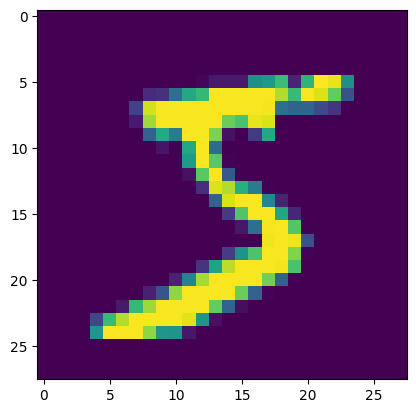

In [12]:
x_traindata = x_train[0]     #visualising image
plt.imshow(x_traindata)

### 2) Question

In [13]:
x = np.zeros((10000, 28, 28, 1))       #array of zeroes
for i in range (10000):
    index = np.random.randint(1, 60000)    #random index for the X
    x[i] = (x_train[index])#randomly getting 10000 images in x
#     print(index)
x = np.asarray(x)
x = x.reshape(10000, -1)               #flattening the images
x.shape #size of x (10000, 784)


(10000, 784)

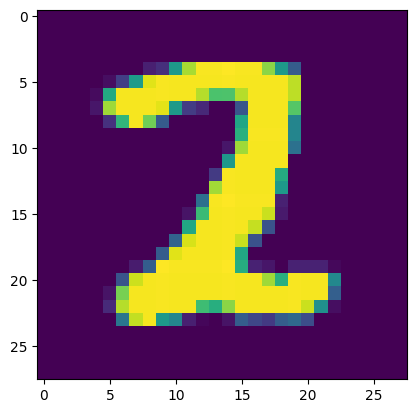

In [14]:
img_initial = x[0].reshape(28,28)
plt.imshow(img_initial)

### 3) Question

In [15]:

def standardise(X):
    mean = np.sum(X, axis = 0)/X.shape[0] #mean by sum along pixels(features) and divide by no. of pixels(features)
    Z = (X-mean)#standardise x by x - mean 
    print(mean.shape)
    return Z, mean

### 4) Question

#### 4.a- standardise X

In [16]:
z, mean = standardise(x)        #shape(10000, 784)
z.shape

(784,)


(10000, 784)

#### 4.b- Projection matrix

In [17]:
Rz = np.dot(z.T, z)/z.shape[0]     #correlation matrix
e, ev = linalg.eigh(Rz)    #eigen value and eigen vector calculation

In [18]:
ev.shape     ## eigen vector per column

(784, 784)

In [19]:
e_index = np.argsort(e)[::-1]      #sorting eigen values and eigen vectors in descending order
e_sorted = e[e_index]
ev_sorted = ev[:, e_index]    # we are sorting column vectors

In [20]:
p = np.dot(z, ev_sorted)       #projection matrix
p.shape

(10000, 784)

In [21]:
ev_sorted.shape

(784, 784)

### 5) Question

#### 5.a- Varying P to get reconstructed image

In [22]:
result_x = []               # will store reconstructed x    
for i in range(24, 785, 20):
    ev_tilted = ev_sorted[:, :i]     #truncating eigen vector from 24, 44, .... in loop
    p_cap = np.dot(z, ev_tilted)     #projected matrix for truncated ev
    xnew_cap = np.dot(p_cap, ev_tilted.T)   #reconstructed images
    xx_cap = xnew_cap + mean         #adding mean corrosponding to it
    result_x.append(xx_cap)          #appending images to array

In [23]:
result_xx = np.asarray(result_x)

In [24]:
result_xx.shape    #shape of array containing all reconstructed images

(39, 10000, 784)

#### 5.b- Visualising the first image in each p and error calculation

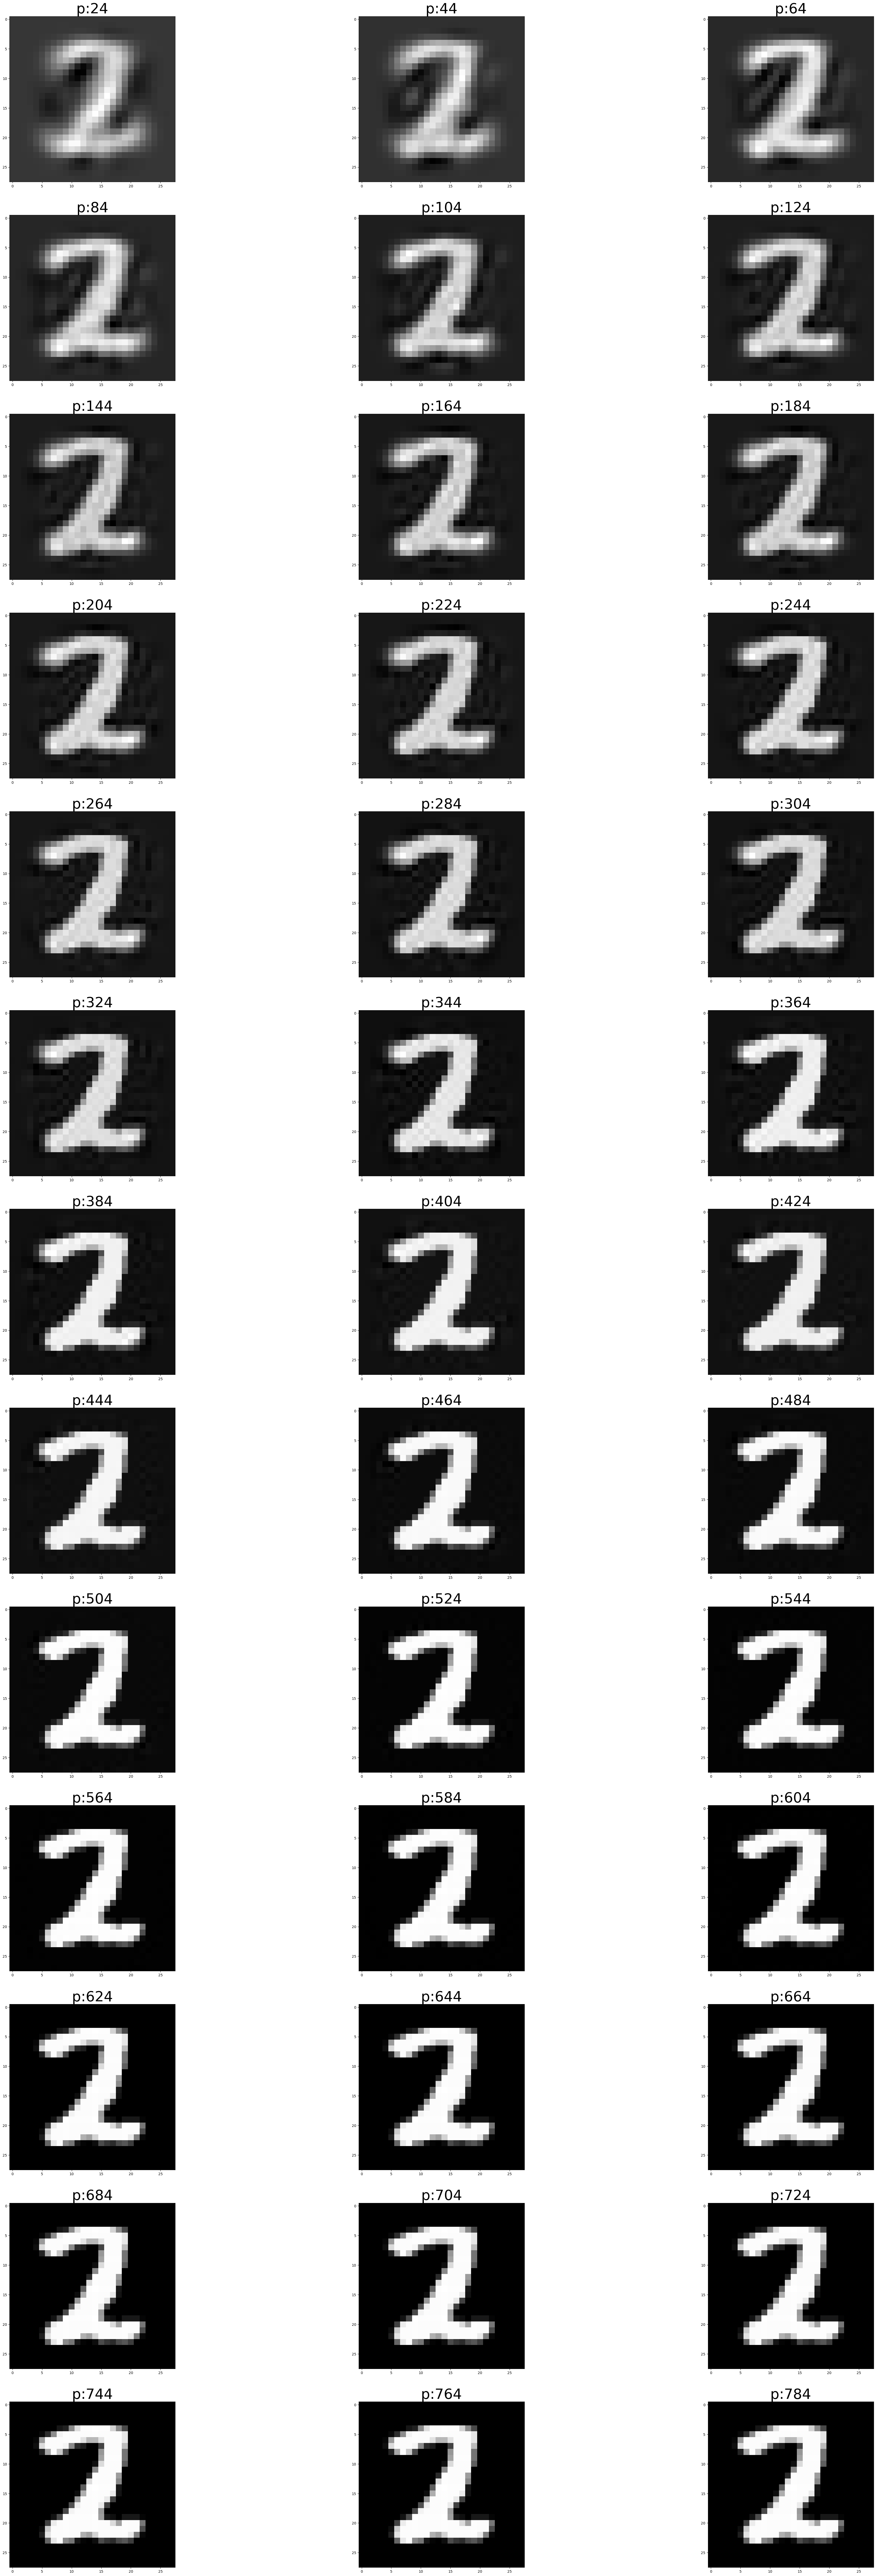

In [25]:
l2_norm = []
fig = plt.figure(figsize= (50, 150))
for i in range (0,39):
    ax = fig.add_subplot(15, 3, i+1)
    im_final = result_xx[i][0].reshape(28, 28)
#     l2_norm.append(np.sqrt(np.sum(np.power((img_initial-im_final),2))))
    diff = np.sum(np.power(img_initial-im_final, 2))
    l2_norm.append(np.sqrt(diff))
    ax.imshow(im_final, cmap='gray')
    ax.set_title("p:"+str(20*i+24), fontsize='40') 
    

#### 5.c- error using L2 norm

In [26]:
l2_norm   # l2 norm error 

[4.273768957802615,
 3.375682564613725,
 2.816341776704738,
 2.5269070454184104,
 2.190953838270796,
 1.9726824464256163,
 1.8403762596033872,
 1.7364762528151731,
 1.6796560678573915,
 1.5210041288254732,
 1.3684866794900974,
 1.2613899630930452,
 1.1669412905765988,
 1.0916247422972487,
 0.9927125176341299,
 0.9226742204863974,
 0.7707015582085062,
 0.6660997619249047,
 0.579528857761214,
 0.446534231307125,
 0.3829975224715725,
 0.3112298023896195,
 0.24054288604592167,
 0.18186391860848986,
 0.14020025319740576,
 0.07598211291244307,
 0.047886524254463894,
 0.025998568757198522,
 0.019874990810524126,
 0.015545490436585093,
 0.005433587031667492,
 0.0029902643247821993,
 0.00035078081472207347,
 1.0334773981968301e-12,
 1.0323198068547872e-12,
 1.0323198068474733e-12,
 1.0323198068474733e-12,
 8.495705031847134e-13,
 9.463916335186235e-14]

### 6) Question

In [27]:
#plotting reconstructed error v/s p 
p_component = np.linspace(24, 784, 39)

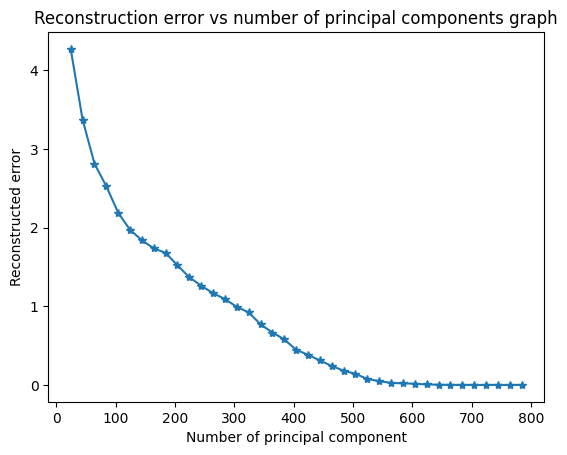

In [28]:
plt.plot(p_component, l2_norm, '-*')
plt.title("Reconstruction error vs number of principal components graph")
plt.xlabel("Number of principal component")
plt.ylabel("Reconstructed error")

In [29]:
#################lenet model 

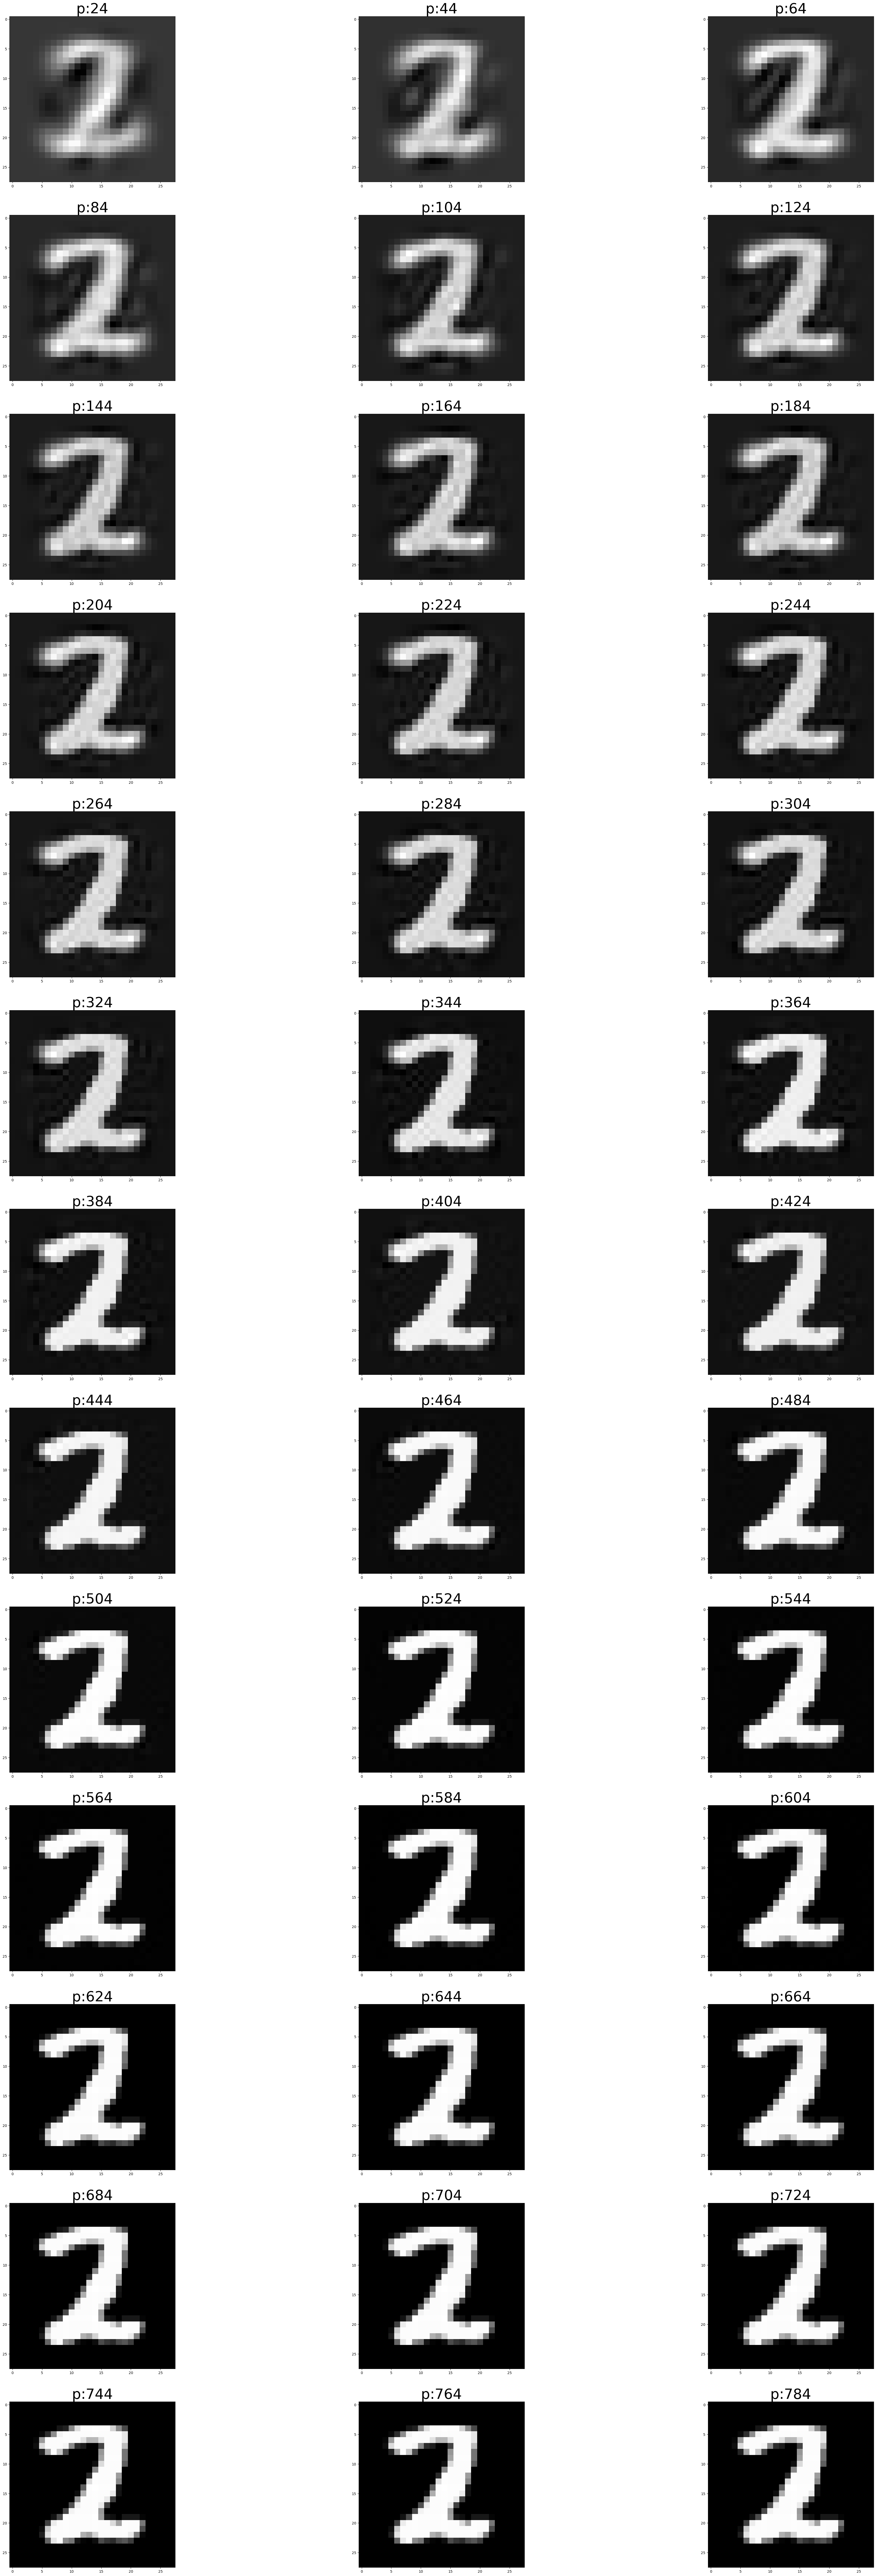

In [32]:
l2_norm = []
fig = plt.figure(figsize= (50, 150))
for i in range (0,39):
    ax = fig.add_subplot(15, 3, i+1)
    im_final = result_xx[i][0].reshape(28, 28)
#     l2_norm.append(np.sqrt(np.sum(np.power((img_initial-im_final),2))))
    diff = np.sum(np.power(img_initial-im_final, 2))
    l2_norm.append(np.sqrt(diff))
    ax.imshow(im_final, cmap='gray')
    ax.set_title("p:"+str(20*i+24), fontsize='40') 